In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def generate_config(x0=0, y0=20, n=30, dx=1.):
    x, y = np.linspace(x0, x0 + dx*n, n), np.linspace(y0, y0, n)
    return x,y

In [3]:
def potential_gradient(x, y, g, k):
    harmonic_gradient_x=np.zeros(len(x))
    harmonic_gradient_y=np.zeros(len(y))
    gravitational_gradient_y=np.zeros(len(x))
    for i in range(1,len(x)-1):
        harmonic_gradient_x[i]=k*(x[i]-x[i-1]) - k*(x[i+1]-x[i])
        harmonic_gradient_y[i]=k*(y[i]-y[i-1]) - k*(y[i+1]-y[i])
        gravitational_gradient_y[i]=g
    return harmonic_gradient_x,harmonic_gradient_y+gravitational_gradient_y
        

In [4]:
def gd(potential_gradient, size, x_init, y_init, alpha=0.02, g=9.81, k=20., ):
    n = len(x_init)
    x_matrix, y_matrix = np.zeros(shape=(size, n)),np.zeros(shape=(size, n))
    x_matrix[0], y_matrix[0] = x_init, y_init
    for i in range(1,size):
        x,y=x_matrix[i-1],y_matrix[i-1]
        current_gradient = potential_gradient(x, y, g, k)
        x_new, y_new = x - alpha*current_gradient[0], y - alpha*current_gradient[1]
        x_matrix[i], y_matrix[i] = x_new, y_new
    return x_matrix, y_matrix                    

In [5]:
x_init, y_init = generate_config()
x_matrix, y_matrix = gd(potential_gradient, 10000, x_init, y_init)

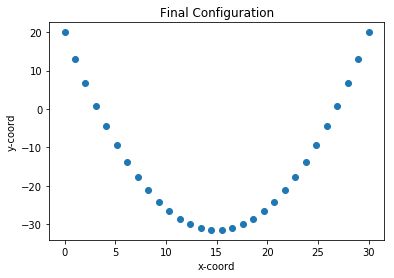

In [6]:
plt.title("Final Configuration")
plt.scatter(x_matrix[-1],y_matrix[-1])
plt.xlabel("x-coord")
plt.ylabel("y-coord")
plt.show()